# BASIC CONFIGURATIONS

In [1]:
### Setup the library ###
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import math
import pprint
import inspect 
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )

import setupLibPaths

import ePix320kM as devBoard

args = None

In [2]:
# ONLY RUN ONCE!
# Defining root
# If crashes, make sure the deve is correct.
root =  devBoard.Root(   
        top_level  = top_level,
        dev        = '/dev/datadev_1',
        pollEn     = False,
        initRead   = True,
        pciePgpEn  = True,
        justCtrl   = False,
        DDebugSize = 4000)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

Root.Core.Si5345Pll.Page0.DataBlock.setPollInterval(1)
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)
Root.Core.AxiVersion count reset called
Root.pciePgp.AxiPcieCore.AxiVersion count reset called
###################################################
#             Firmware Version                    #
###################################################
Path         = Root.Core.AxiVersion
FwVersion    = 0x1020000
UpTime       = 1:05:35
GitHash      = 0x393c980a1f8113827af1070f3f4dda31fa4ed361
XilinxDnaId  = 0x4002000001608a0624908205
FwTarget     = ePixHRM320k
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv314 (Ubuntu 20.04.6 LTS)
BuildDate    = Wed 04 Dec 2024 12:40:47 PM PST
Builder      = dnajjar
###################################################


In [3]:
#Run this from a teminal in your localhost without the (!). If you run it here, it will open on rdsrv314 Jupyter server terminal and you won't see it.
#!python -m pyrogue gui --server='localhost:9099'

In [4]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([4,1,1,1,1])

Rysync ASIC started
Did not find SspMonGrp_carrier file. Using generic.
Did not find SspMonGrp_carrier file. Using generic.
Did not find specific ASIC1 file. Using generic.
Did not find specific ASIC2 file. Using generic.
Did not find specific ASIC3 file. Using generic.
Did not find specific ASIC4 file. Using generic.
Init ASIC script started
Loading PLL configuration
Loading supply configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_PowerSupply_Enable.yml
Loading lane delay configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_SspMonGrp_carrier.yml
Loading waveforms configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_RegisterControl.yml
Loading batcher configurations
Loading /afs/slac.sta

In [5]:
run helperFunctions.ipynb

# FPGA Charge Injection

In [6]:
ASICNUM=2
ASIC=ASIC2
DEBUG=DEBUG2

pulserStep = 1
firstCol = 100
lastCol = 150

CompTH_ePixM = 0

In [ ]:
# Perform descrambled acquisition using debug class without writing to file. Has awesome descrambling performance
root.enableAllAsics(False)
root.enableAsic(ASICNUM, True)
DEBUG.enableDataDebug(True)
DEBUG.cleanData()

#Set ASIC registers
ASIC.CompTH_ePixM.set(CompTH_ePixM)

CE = APP.FPGAChargeInjection

CE.startCol.set(firstCol)
CE.endCol.set(lastCol)
CE.step.set(pulserStep)
CE.currentAsic.set(ASICNUM)
CE.TimingTriggerChargeInjection()
CE.Start()

#give time for CE to reach point to wait for trigger
time.sleep(1)

TRIG.SetTimingTrigger()

frames = int(1024 / pulserStep)

# Although the triggers above may have finished, descrambling takes time
while ( frames > DEBUG.getData().shape[2]) :
    time.sleep(1)
    print("Descrambled {}".format(DEBUG.getData().shape[2]), end='\r')
print("Data Descrambled")
print(DEBUG.getData().shape)

TRIG.StopTriggers()

Set Timing Trigger command executed


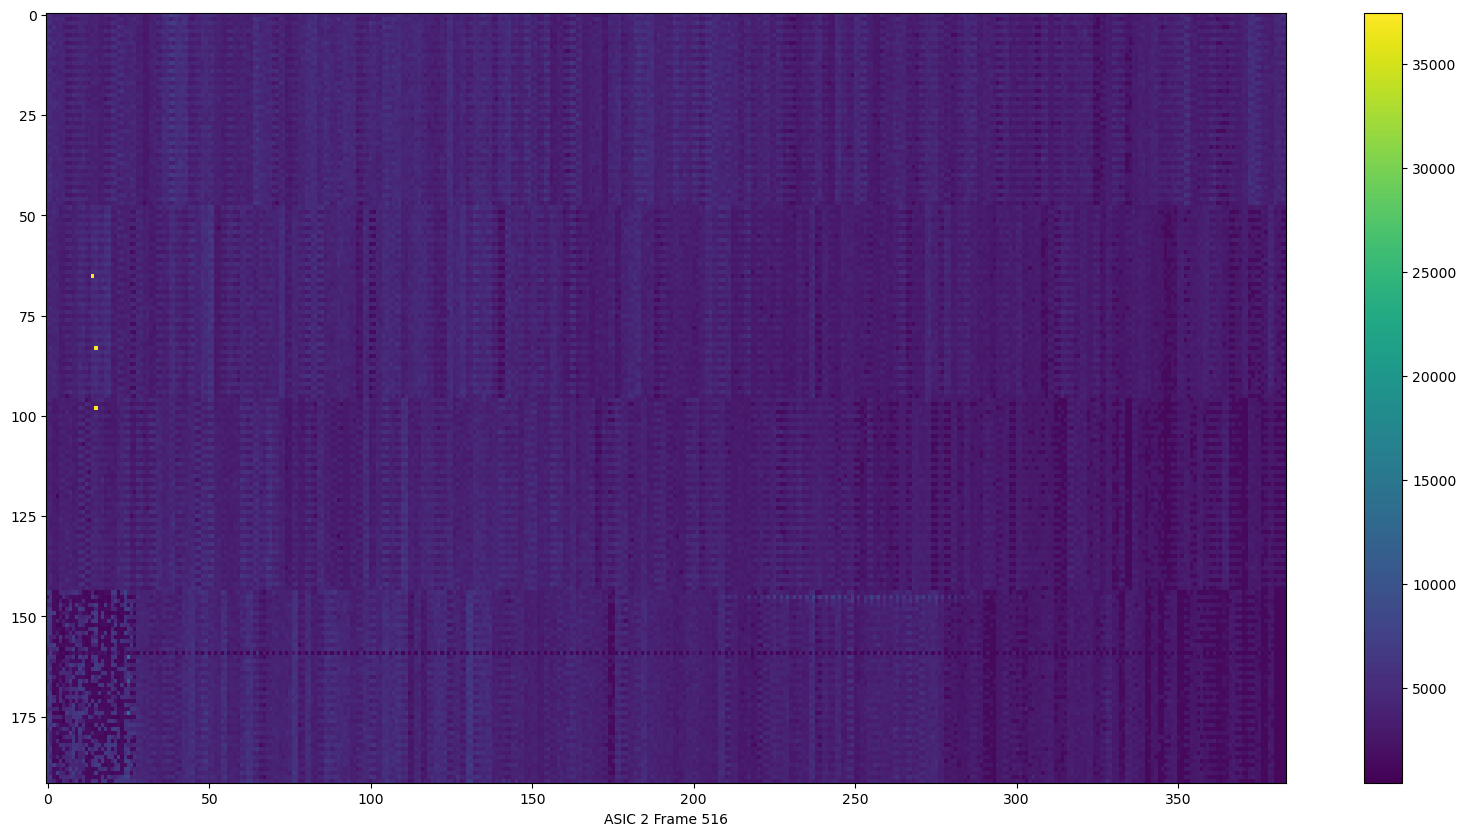

In [35]:
#Display image. Note that Interpolation is enabled. That is similar to auto contrast
plt.figure(figsize = (20,10))
plt.imshow(DEBUG.getData()[:,:,1024], interpolation='nearest', aspect='auto')
plt.xlabel("ASIC {} Frame {}".format(ASICNUM,int(DEBUG.getData().shape[2]/2)))
plt.colorbar()

In [18]:
# Disable data debug so it does not store data infinitely and crash software
DEBUG.cleanData()
print(DEBUG.getData().shape)
DEBUG.enableDataDebug(False)

(192, 384, 0)
